In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 

In [2]:
data = [
    ['Hours_Studied','Test_Grade','Status','Result'],
    [2,57,'fail','D'],
    [3,66,'fail','D'],
    [4,73,'pass','C'],
    [5,76,'pass','C'],
    [6,79,'pass','C'],
    [7,81,'pass','B'],
    [8,90,'pass','B'],
    [9,96,'pass','A'],
    [10,100,'pass','A'],
]

In [3]:
df = pd.DataFrame(data)

In [4]:
df

,0,1,2,3
0,Hours_Studied,Test_Grade,Status,Result
1,2,57,fail,D
2,3,66,fail,D
3,4,73,pass,C
4,5,76,pass,C
5,6,79,pass,C
6,7,81,pass,B
7,8,90,pass,B
8,9,96,pass,A
9,10,100,pass,A


In [5]:
df.columns = df.iloc[0]
df = df.drop(0).reset_index(drop=True)

In [6]:
from sklearn.preprocessing import LabelBinarizer,LabelEncoder

In [18]:
X = df[['Hours_Studied']]
y = df['Test_Grade']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [43]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [44]:
X_train

,Hours_Studied
6,8
2,4
3,5
0,2
5,7
7,9
8,10


In [45]:
print("Slope (m):", model.coef_[0])
print("Intercept (b):", model.intercept_)

Slope (m): 5.097701149425287
Intercept (b): 49.08620689655173


In [46]:
print("R² Score:", model.score(X, y))

R² Score: 0.9754239528787766


In [47]:
X_test

,Hours_Studied
4,6
1,3


In [48]:
ypred = model.predict(X_test)

In [63]:
y_test

4    79
1    66
Name: Test_Grade, dtype: object

In [64]:
model.predict(X_test.iloc[0].values.reshape(1,1))

array([79.67241379])

In [65]:
import warnings 
warnings.filterwarnings('ignore')
predicted = model.predict([[9]])
print("Predicted Grade:", predicted[0])

Predicted Grade: 94.96551724137932


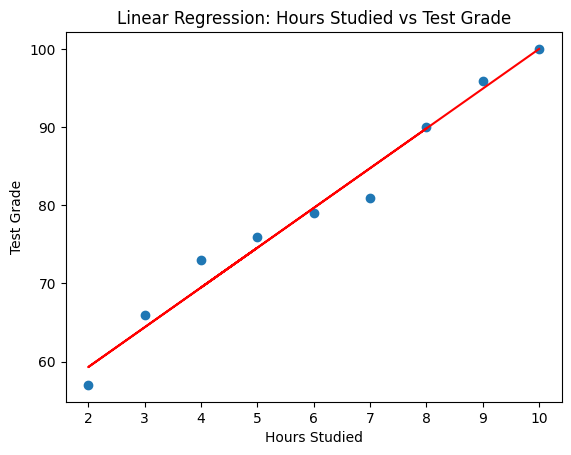

In [70]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X_train, model.predict(X_train),color="red")
plt.xlabel("Hours Studied")
plt.ylabel("Test Grade")
plt.title("Linear Regression: Hours Studied vs Test Grade")
plt.show()

In [97]:
m = model.coef_
b = model.intercept_
# y = mx + c 
# y = test grade 
# x = hours studied
print("slope (m)",m)
print("intercept",b)
df['predicted'] = m * X + b

slope (m) [5.09770115]
intercept 49.08620689655173


In [93]:
df

,Hours_Studied,Test_Grade,Status,Result,predicted
0,2,57,fail,D,59.281609
1,3,66,fail,D,64.37931
2,4,73,pass,C,69.477011
3,5,76,pass,C,74.574713
4,6,79,pass,C,79.672414
5,7,81,pass,B,84.770115
6,8,90,pass,B,89.867816
7,9,96,pass,A,94.965517
8,10,100,pass,A,100.063218


In [95]:
# Test_grade = m x hours_studied + b

# m - weightage ->  hours_studied depends on m

In [96]:
import pickle

In [100]:
pickle.dump(model,open("marksModel.pkl","wb"))